In [2]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score #métrica de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import warnings #remoção de avisos

Baixando o dataset

In [3]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

# Listar os arquivos dentro do diretório do dataset
print("\nFiles in the dataset directory:")
for file_name in os.listdir(path):
    print(file_name)
print("Path to dataset files:", path)


Files in the dataset directory:
data.csv
Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [4]:
import pandas as pd


Conhecendo a estrutura dos dados, podemos ver que há variáveis categóricas e escalas de valores totalmente diferentes entre si

In [5]:
dados = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
dados.head(20)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   
5     843786         M        12.45         15.70           82.57      477.1   
6     844359         M        18.25         19.98          119.60     1040.0   
7   84458202         M        13.71         20.83           90.20      577.9   
8     844981         M        13.00         21.82           87.50      519.8   
9   84501001         M        12.46         24.04           83.97      475.9   
10    845636         M        16.02         23.24          102.70      797.8   
11  84610002         M        15.78         17.89          103.60      781.0   
12    846226         M        19.17         24.80          132.40     1123.0   
13    846381         M        15.85         23.95          103.70      782.7   
14  84667401         M        13.73         22.61           93.60      578.3   
15  84799002         M        14.54         27.54           96.73      658.8   
16    848406         M        14.68         20.13           94.74      684.5   
17  84862001         M        16.13         20.68          108.10      798.8   
18    849014         M        19.81         22.15          130.00     1260.0   
19   8510426         B        13.54         14.36           87.46      566.3   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   
15          0.11390           0.15950         0.16390              0.07364   
16          0.09867           0.07200         0.07395              0.05259   
17          0.11700           0.20220         0.17220              0.10280   
18          0.09831           0.10270         0.14790              0.09498   
19          0.09779           0.08129         0.06664              0.04781   

    ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0   ...          17.33           184.60      2019.0            0.1622   
1   ...          23.41           158.80      1956.0            0.1238   
2   ...          25.53           152.50      1709.0            0.1444   
3   ...          26.50            98.87       567.7            0.2098   
4   ...          16.67           152.20      1575.0            0.1374   
5   ...          23.75           103.40       741.6            0.1791   
6   ...          27.66           153.20      1606.0            0.1442   
7   ...          28.14           110.60       897.0            0.1654   
8   ...          30.73           

Como podemos ver a tabela ID tem relação onde os dados foram extraidos e não são necessários para nossa análise, então o correto é removê-lo

In [6]:
dados=dados.drop('id',axis=1)
dados.head(3)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38           122.8     1001.0   
1         M        20.57         17.77           132.9     1326.0   
2         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33            184.6      2019.0   
1         0.1812  ...          23.41            158.8      1956.0   
2         0.2069  ...          25.53            152.5      1709.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0          0.4601                  0.11890          NaN  
1          0.2750                  0.08902          NaN  
2          0.3613                  0.08758          NaN  

[3 rows x 32 columns]

Agora vamos investigar os valores max, min e media de cada tabela de dados

In [7]:
dados.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  texture_worst  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst  Unnamed: 32  
count               569.000000          0.0  
mean                  0.083946          NaN  
std                   0.018061          NaN  
min                   0.055040          NaN  
25%                   0.071460          NaN  
50%                   0.080040          NaN  
75%                   0.092080          NaN  
max                   0.207500          NaN  

[8 rows x 31 columns]

In [8]:
dados.shape

(569, 32)

O dataset tem 569 linhas e 32 colunas

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Podemos ver que nossa variavel categorica é nossa target e todas as colunas tem o msm formato e com msm numero de linhas, podemos ver com análise que há uma coluna que não há informações, e parece n ter relações com nosso dataset, necessitando a remoção

In [10]:
dados=dados.drop('Unnamed: 32',axis=1)
dados.head(3)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38           122.8     1001.0   
1         M        20.57         17.77           132.9     1326.0   
2         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33            184.6   
1         0.1812  ...         24.99          23.41            158.8   
2         0.2069  ...         23.57          25.53            152.5   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  

[3 rows x 31 columns]

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dados['diagnosis']=encoder.fit_transform(dados['diagnosis'])

Aqui necessário Usar labelEnconder para transformar nossa variável target que é do tipo categórica em  1 e 0

In [12]:
features_mean_with_diagnosis = [col for col in dados.columns if '_' in col or col == 'diagnosis']

X = dados[features_mean_with_diagnosis] # X agora é um DataFrame com as colunas corretas
# y pode continuar sendo um array NumPy, pois o SHAP não precisa dos nomes das colunas de y
y = dados['diagnosis'].values

# --- Verificação (opcional, mas recomendado para confirmar) ---
print(f"Tipo de X após a definição: {type(X)}")
print(f"Shape de X: {X.shape}")
print(f"Colunas de X: {X.columns.tolist()}")
print(f"Tipo de y após a definição: {type(y)}")
print(f"Shape de y: {y.shape}")

Tipo de X após a definição: <class 'pandas.core.frame.DataFrame'>
Shape de X: (569, 31)
Colunas de X: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Tipo de y após a definição: <class 'numpy.ndarray'>
Shape de y: (569,)


Após, colocamos os valores na variável X e y para criar a matriz de correlação

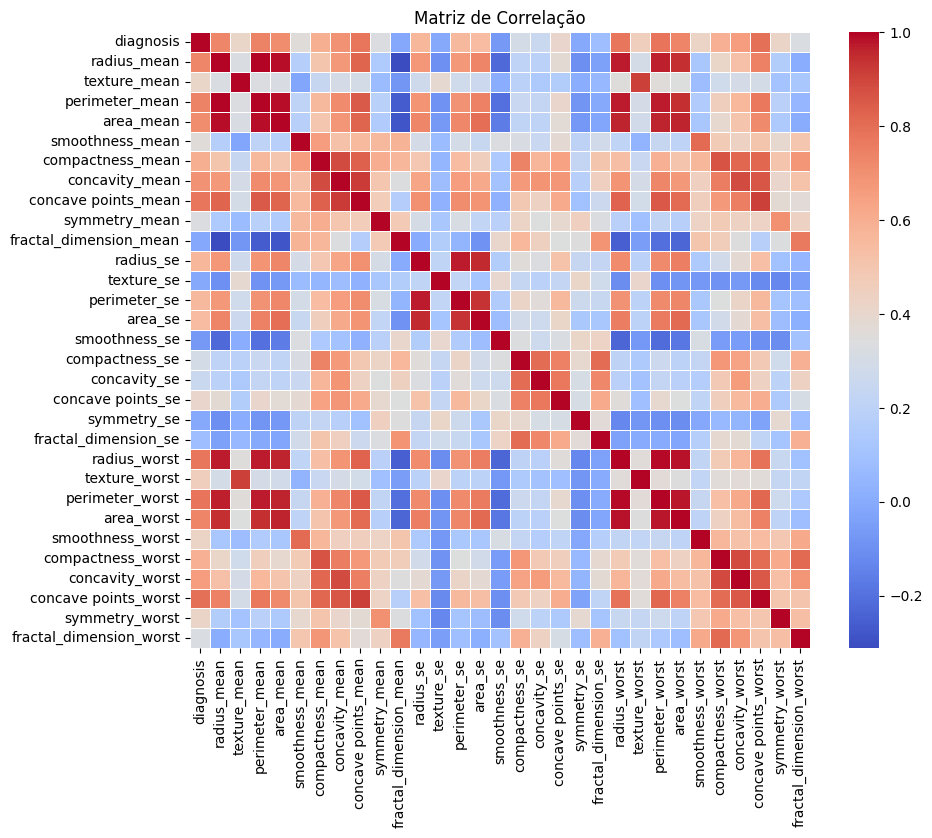

In [13]:
import seaborn as sns
correlation_matrix = X.corr()
# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [14]:
from sklearn.impute import SimpleImputer
# `nontarget` seria o DataFrame completo sem a variável `diagnosis`.
nontarget = dados.drop('diagnosis', axis=1)

# `features` seria a lista com os nomes de todas as colunas de `nontarget`.
features = nontarget.columns.tolist()
imputer = SimpleImputer(strategy='mean')
X_padronizado = pd.DataFrame(imputer.fit_transform(nontarget), columns=features)
display(X_padronizado.head())

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

nessa etapa vemos o gráfico apara entendermos o melhor número de componentes para limitar a quantidade de colunas visando a melhor variância de nossa base

Para limiar em 95% podemos ver que precisaremos de 7 colunas

Exibindo a proporção entre as colunas principais e a variância explicada

Abaixo criaremos um historigram para analisar a distribuição dos dados de cada coluna PC

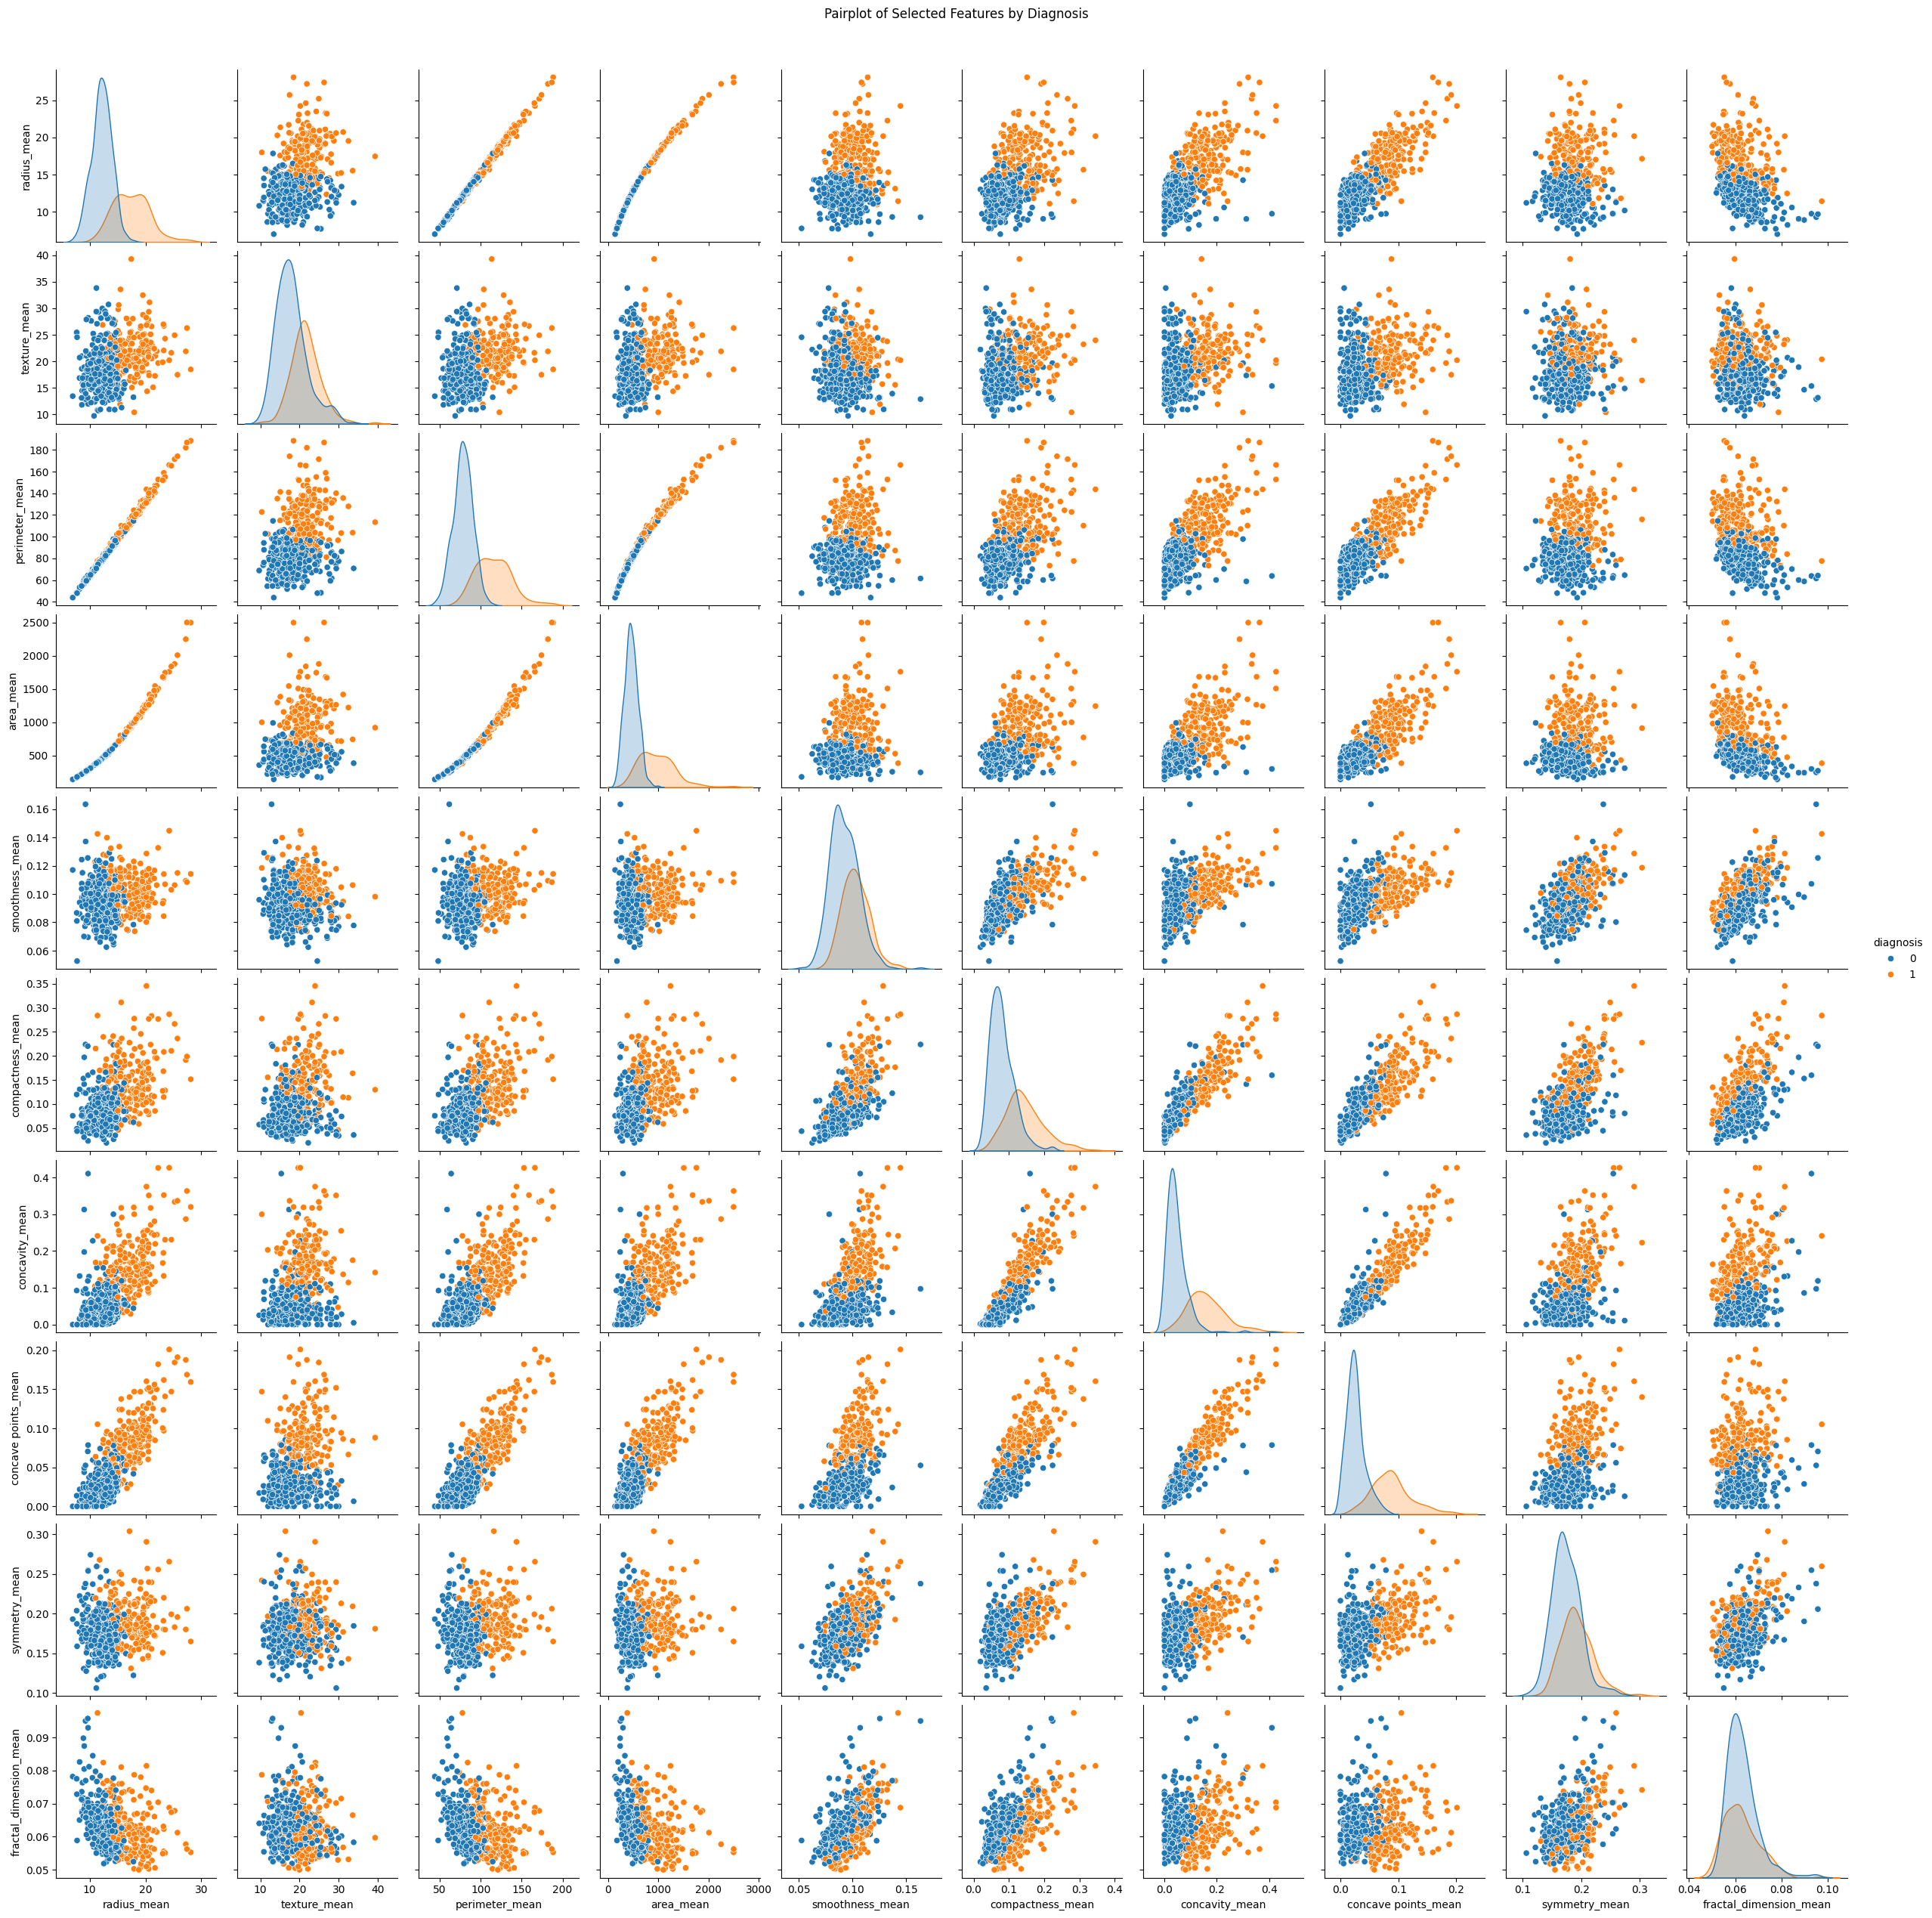

In [15]:
features_mean = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'fractal_dimension_mean',
    'diagnosis'  # Adicionamos a variável alvo para visualização
]
sns.pairplot(dados[features_mean], hue='diagnosis', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.show()

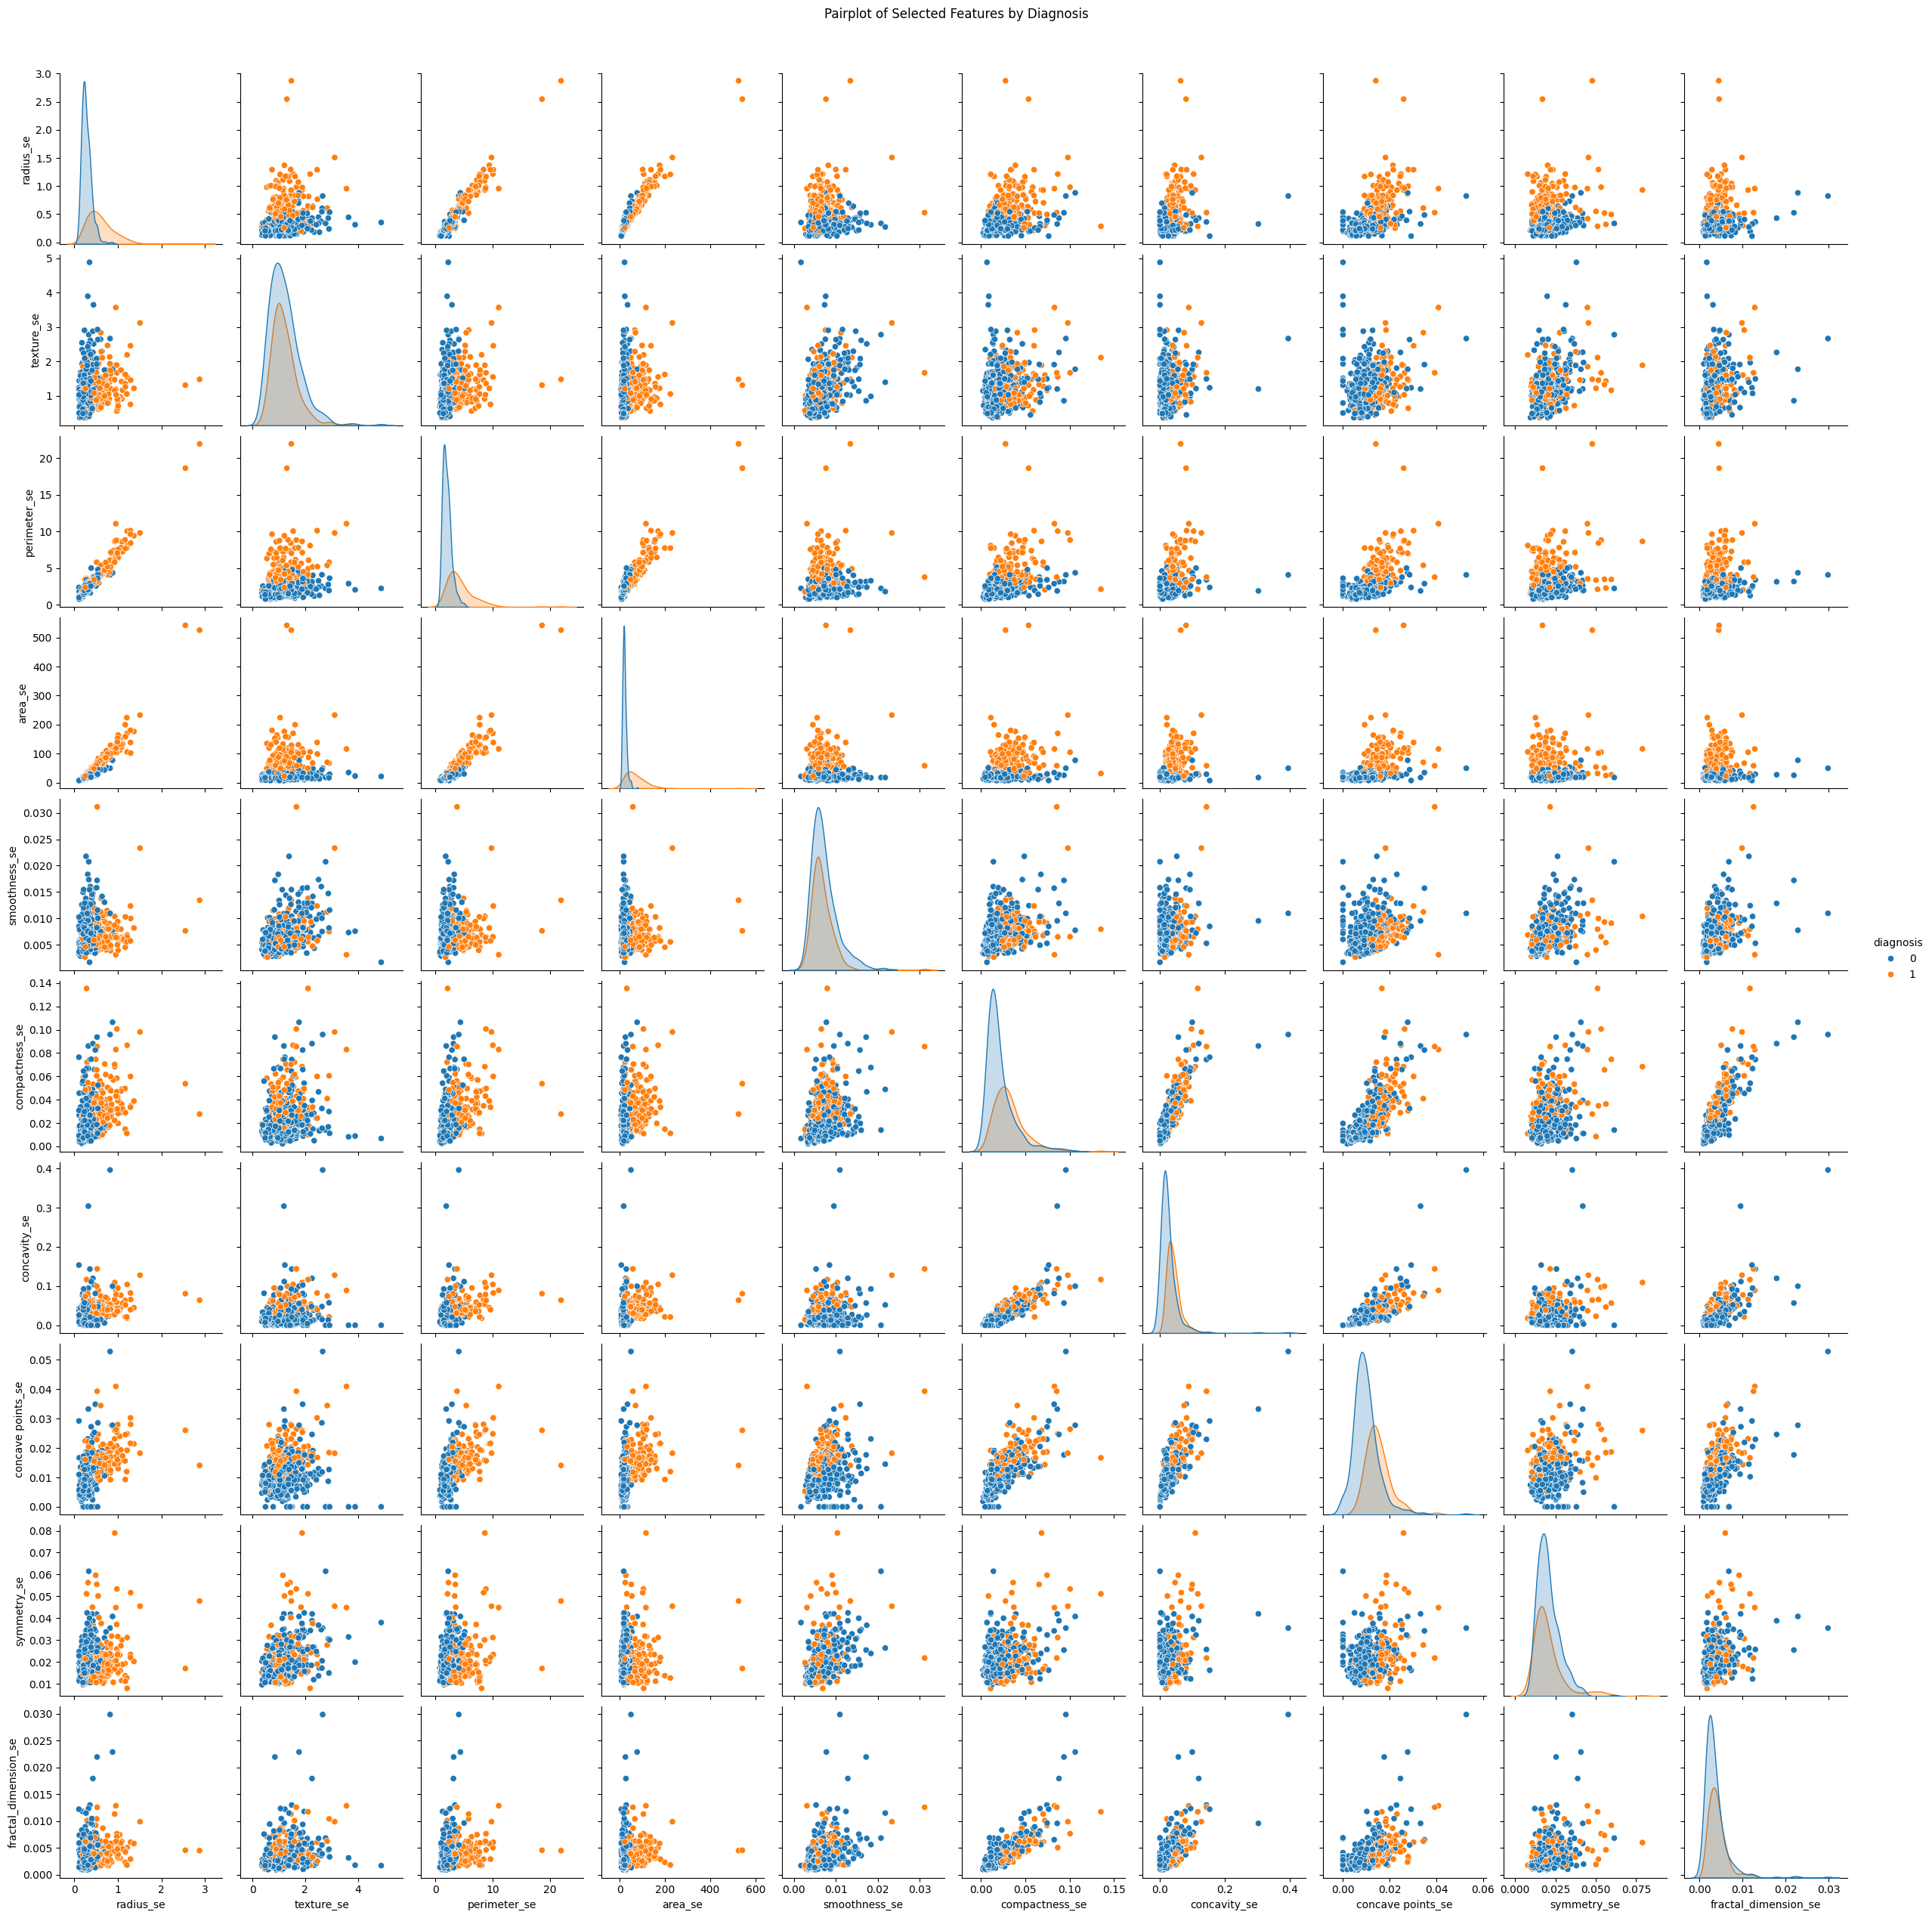

In [16]:
features_se = [
    'radius_se',
    'texture_se',
    'perimeter_se',
    'area_se',
    'smoothness_se',
    'compactness_se',
    'concavity_se',
    'concave points_se',
    'symmetry_se',
    'fractal_dimension_se',
    'diagnosis'
]
sns.pairplot(dados[features_se], hue='diagnosis', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.show()

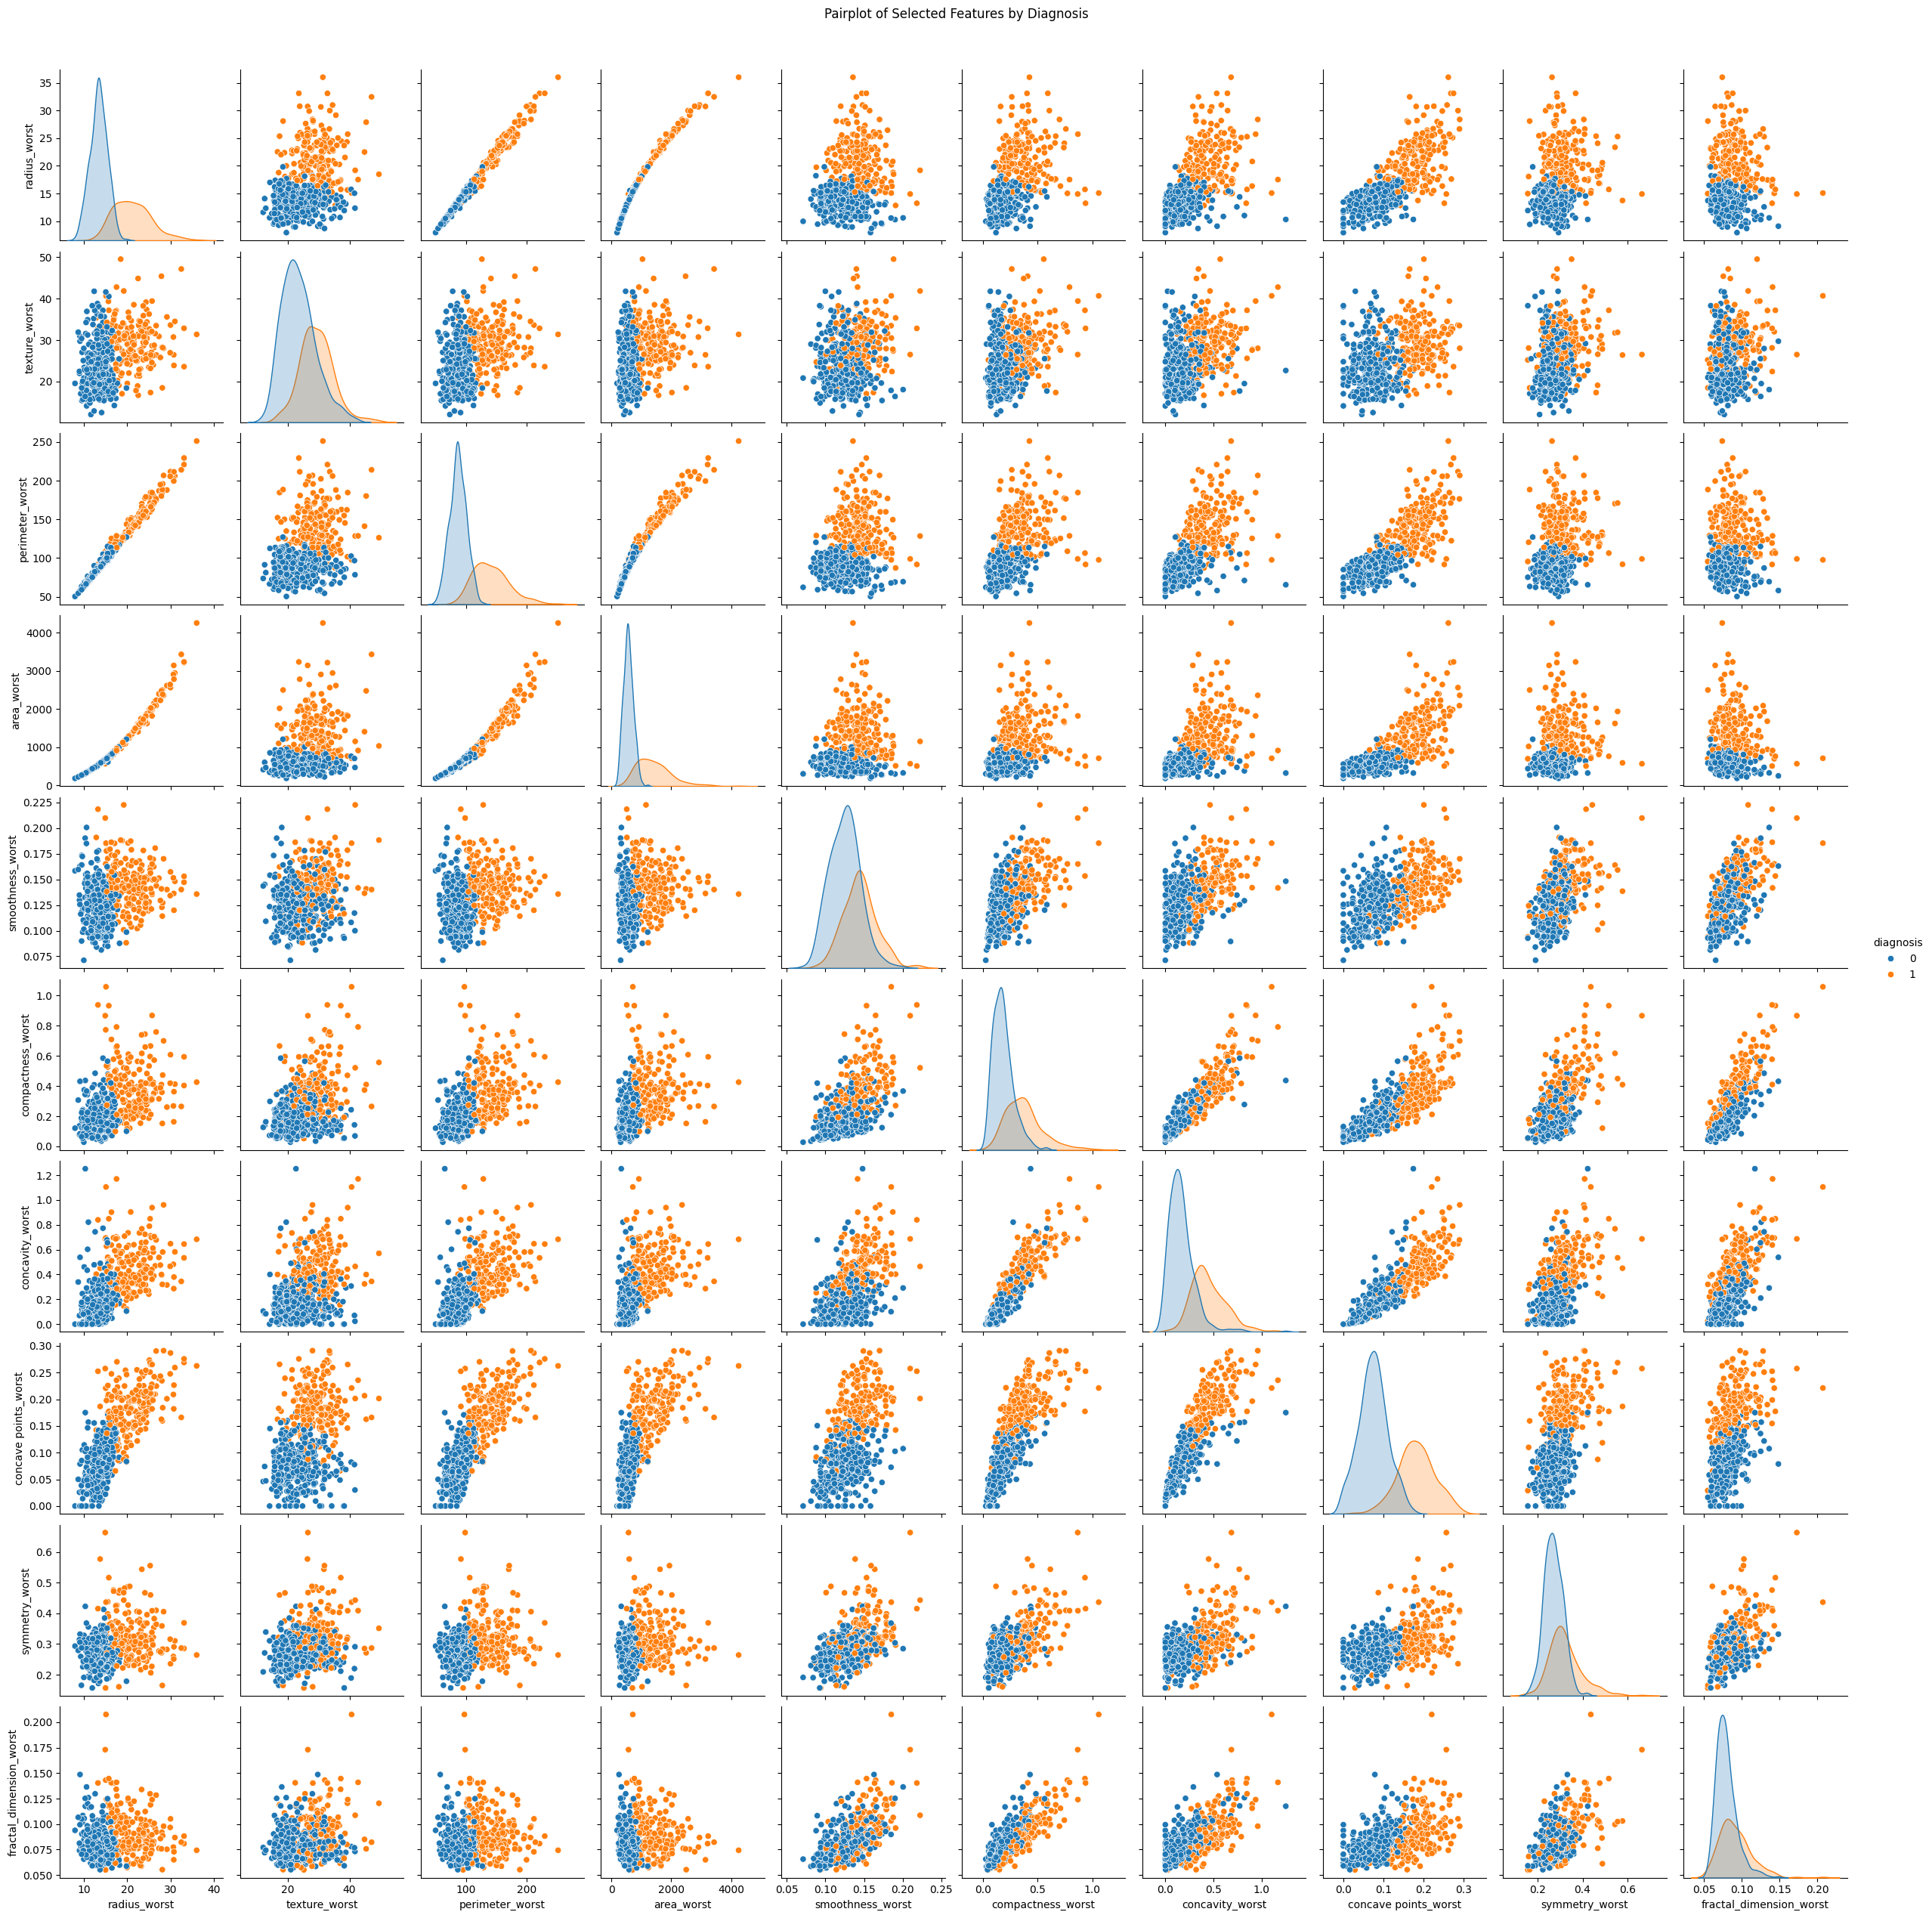

In [17]:
features_worst = [
    'radius_worst',
    'texture_worst',
    'perimeter_worst',
    'area_worst',
    'smoothness_worst',
    'compactness_worst',
    'concavity_worst',
    'concave points_worst',
    'symmetry_worst',
    'fractal_dimension_worst',
    'diagnosis'
]
sns.pairplot(dados[features_worst], hue='diagnosis', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.show()

Podemos ver no gráfico que a distribuição dos dados não é normal, mas representam perfeitamente a estrutura do mundo real

Confirmamos nossa analise usando shapiro e mostrando o valor de p que está muito baixo, mostrando que nossa variação de dados nas variáveis não tem distribuição normal

In [18]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [19]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.svm import SVC # Support Vector Classifier (SVC)
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier (KNNC)
from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Machine (GBM)
from xgboost import XGBClassifier # XGBoost (Extreme Gradient Boosting)
from lightgbm import LGBMClassifier # LightGBM
from catboost import CatBoostClassifier # CatBoost
from sklearn.model_selection import cross_val_score


import warnings
warnings.simplefilter('ignore')

Agora precisamos treinar nosso modelo com as colunas PC

Usaremos standardScaler para transformar os dados de treinamento e teste da coluna X em formato padronizado.

In [20]:
scaler = StandardScaler()
X =  X.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# --- 1. Otimização da Regressão Logística (mantida) ---
pipeline_lr = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(random_state=42, max_iter=1000))])
params_lr = {'lr__C': [0.01, 0.1, 1, 10], 'lr__penalty': ['l2'], 'lr__solver': ['lbfgs', 'liblinear']}
logistic_regression_optimized = GridSearchCV(pipeline_lr, param_grid=params_lr, cv=5, scoring='f1', n_jobs=-1)

# --- 2. Otimização do SVC ---
pipeline_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC(probability=True, random_state=42))])
params_svc = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf'] # O kernel RBF geralmente é o melhor para este tipo de problema
}
svc_optimized = GridSearchCV(pipeline_svc, param_grid=params_svc, cv=5, scoring='f1', n_jobs=-1)

# --- 3. Otimização do Random Forest ---
pipeline_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])
params_rf = {
    'rf__n_estimators': [50, 100, 200], # Número de árvores
    'rf__max_depth': [None, 10, 20],   # Profundidade máxima da árvore
    'rf__min_samples_split': [2, 5, 10]  # Mínimo de amostras para dividir um nó
}
random_forest_optimized = GridSearchCV(pipeline_rf, param_grid=params_rf, cv=5, scoring='f1', n_jobs=-1)

# --- 4. Otimização do KNN ---
pipeline_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
params_knn = {
    'knn__n_neighbors': [3, 5, 7, 9], # Número de vizinhos
    'knn__weights': ['uniform', 'distance'], # Peso dos vizinhos
    'knn__metric': ['euclidean', 'manhattan'] # Métrica de distância
}
knn_optimized = GridSearchCV(pipeline_knn, param_grid=params_knn, cv=5, scoring='f1', n_jobs=-1)


# --- Dicionário de modelos com todas as otimizações ---
models = {
    'LogisticRegression_Optimized': logistic_regression_optimized,
    # 'SVC_Optimized': svc_optimized,
    'RandomForest_Optimized': random_forest_optimized,
    # 'KNN_Optimized': knn_optimized,
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    # 'NaiveBayes': GaussianNB(),
    # 'GradientBoosting': GradientBoostingClassifier(random_state=42),
    # 'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    # 'LightGBM': LGBMClassifier(random_state=42),
    # 'CatBoost': CatBoostClassifier(random_state=42, silent=True)
}

Aqui, após criar um array de models, nós criaremos métricas para visualizar a performance de cada modelo

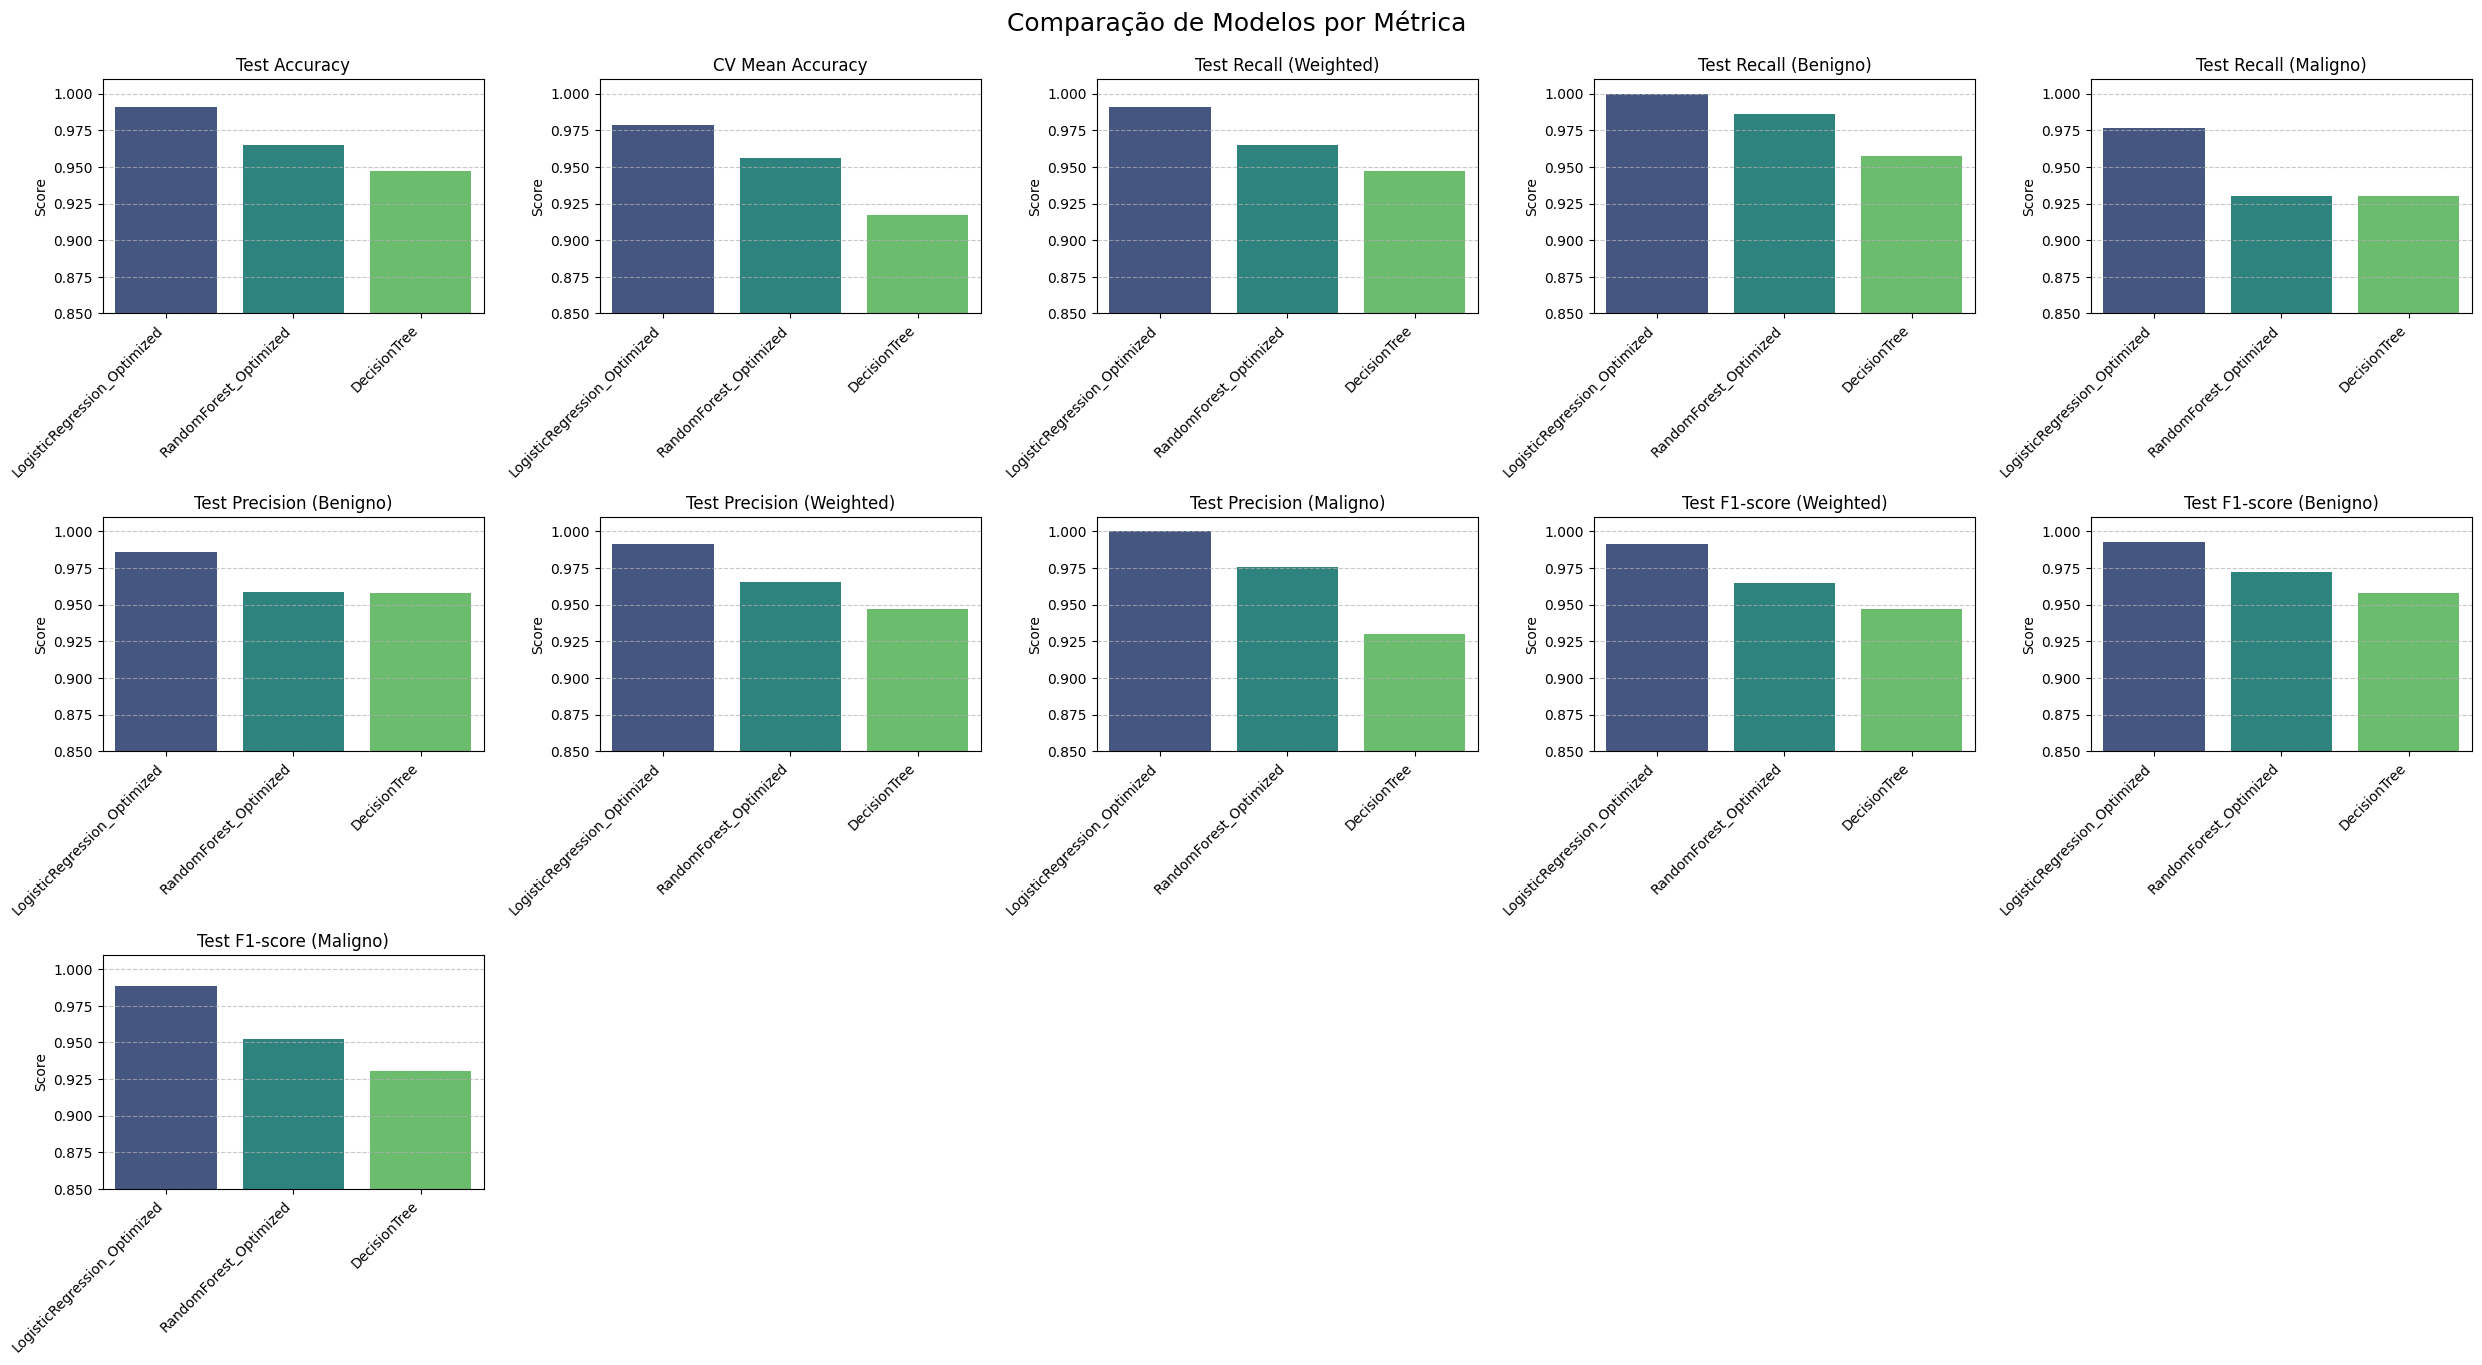


--- Análise de Desempenho Visualizada por Métrica. ---


In [26]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns # Importar seaborn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

results = [] # Lista para armazenar os resultados
cv_scores_data = {}
for name, model in models.items():

    model.fit(X_train_scaler, y_train)

    y_pred = model.predict(X_test_scaler)

    y_acc = accuracy_score(y_test, y_pred) # Corrected order: y_true, y_pred

    pipeline = Pipeline([
        ('scaler', StandardScaler()), # Ensure scaler is applied in CV
        ('model', model) # The model will be cloned and trained inside the pipeline
    ])
    # Note: X and y passed here should be the ORIGINAL, UNSEALED data
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

    # Armazena os scores para o boxplot
    cv_scores_data[name] = scores
    cv_mean_accuracy = scores.mean() # Calculate mean for table
    cv_std_dev = np.std(scores) # Calculate std dev for table
    target_names = ['Benigno', 'Maligno'] # Confirm if 0 is Benigno and 1 is Maligno
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

    results.append({
        'Model': name,
        'Test Accuracy': y_acc,
        'Test Precision (Weighted)': report['weighted avg']['precision'],
        'Test Recall (Weighted)': report['weighted avg']['recall'],
        'Test F1-score (Weighted)': report['weighted avg']['f1-score'],
        'CV Mean Accuracy': cv_mean_accuracy,
        'CV Std Dev': cv_std_dev, # Store std dev in results_df
        'Test Precision (Benigno)': report['Benigno']['precision'],
        'Test Recall (Benigno)': report['Benigno']['recall'],
        'Test F1-score (Benigno)': report['Benigno']['f1-score'],
        'Test Precision (Maligno)': report['Maligno']['precision'],
        'Test Recall (Maligno)': report['Maligno']['recall'],
        'Test F1-score (Maligno)': report['Maligno']['f1-score'],
        'Model_Object': model # Keep model object if needed for later use (e.g., SHAP)
    })


results_df = pd.DataFrame(results)
# Drop 'Model_Object' for display if it's not meant to be printed directly
# Definindo as métricas que você quer plotar separadamente
metrics_for_individual_plots = [
    'Test Accuracy',
    'CV Mean Accuracy', # Incluindo a acurácia média de CV aqui também

    'Test Recall (Weighted)',
    'Test Recall (Benigno)',
    'Test Recall (Maligno)',
    'Test Precision (Benigno)',
    'Test Precision (Weighted)',
    'Test Precision (Maligno)',
    'Test F1-score (Weighted)',
    'Test F1-score (Benigno)',
    'Test F1-score (Maligno)'
]

# Definir o layout dos subplots
n_rows = (len(metrics_for_individual_plots) + 2) // 3 # Arredonda para cima
n_cols = 5 # Número de colunas desejado

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Ajusta o tamanho total da figura

for i, metric in enumerate(metrics_for_individual_plots):
    plt.subplot(n_rows, n_cols, i + 1) # (linhas, colunas, posição atual)
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.title(f'{metric}', fontsize=12)
    plt.xlabel('') # Remove o label do eixo X para não poluir os gráficos pequenos
    plt.ylabel('Score')
    plt.ylim(0.85, 1.01) # Mantenha a mesma escala no Y para facilitar comparação
    plt.xticks(rotation=45, ha='right') # Rotaciona os labels do X para caber
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Ajusta automaticamente o espaçamento entre os subplots
plt.suptitle('Comparação de Modelos por Métrica', y=1.02, fontsize=18) # Título geral
plt.show()

print("\n--- Análise de Desempenho Visualizada por Métrica. ---")

Nessa etapa o codigo escolhe o melhor modelo para análisarmos

In [28]:
# Escolhendo o melhor modelo
# Ordenar por F1-score decrescente e, em caso de empate, por CV Mean Accuracy decrescente
results_df = pd.DataFrame(results)
best_model_row = results_df.sort_values(by=['Test F1-score (Benigno)','Test F1-score (Maligno)', 'CV Mean Accuracy'], ascending=[False, False,False]).iloc[0]
print(best_model_row)
best_model_name = best_model_row['Model']
best_model_object = best_model_row['Model_Object'] # Recupera o objeto do modelo treinado

print(f"\n--- O Melhor Modelo Escolhido para Análise SHAP é: {best_model_name} ---")

Model                                             LogisticRegression_Optimized
Test Accuracy                                                         0.991228
Test Precision (Weighted)                                              0.99135
Test Recall (Weighted)                                                0.991228
Test F1-score (Weighted)                                              0.991207
CV Mean Accuracy                                                      0.978916
CV Std Dev                                                            0.004272
Test Precision (Benigno)                                              0.986111
Test Recall (Benigno)                                                      1.0
Test F1-score (Benigno)                                               0.993007
Test Precision (Maligno)                                                   1.0
Test Recall (Maligno)                                                 0.976744
Test F1-score (Maligno)                             

Agora criaremos uma parte para a análise shape para entendermos como nosso modelo conseguiu chegar no resultado


--- Iniciando a interpretação SHAP para o modelo: Logistic Regression with PCA ---

Calculando os valores SHAP para o conjunto de teste...
Valores SHAP calculados.

Gerando gráficos SHAP para insights do modelo...
O tipo de shap_values é: <class 'numpy.ndarray'>
O número de classes é: 114
O formato da matriz para a classe 0 é: (30,)
O formato da matriz para a classe 1 é: (30,)

Exibindo o Gráfico de Resumo (Summary Plot) - Importância Global das Features ...


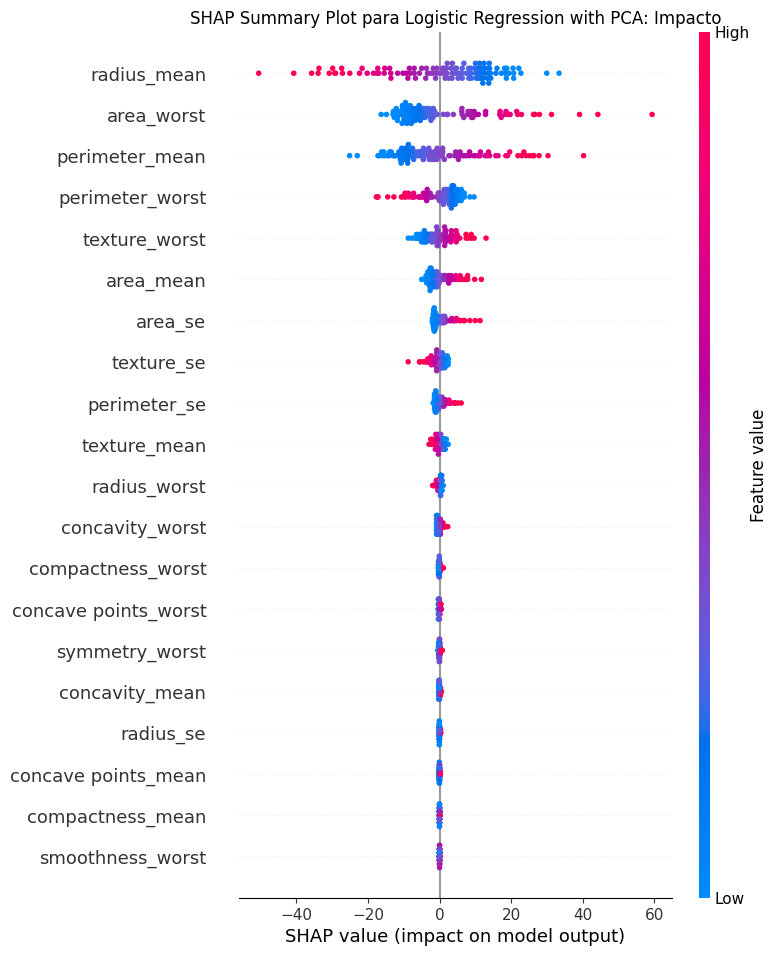

[ 8.14027198e+00  3.80291373e-01 -6.04337433e+00 -1.73786143e+00
  2.21077682e-03 -3.15479334e-03 -3.10633821e-02 -2.61874052e-02
  9.26060715e-03 -2.56737623e-05  2.09842469e-03  5.82558092e-01
 -2.63351222e-01 -5.33096893e-01 -1.63638915e-05  9.32236161e-03
  9.26169070e-03 -2.30987333e-04 -8.44085507e-05  1.07474657e-04
  1.66575189e-01 -1.13345326e+00  2.02027759e+00 -4.82586183e+00
  1.44322571e-02 -5.19769760e-02 -8.53108320e-02 -5.72390267e-02
  2.75611800e-03 -3.32402358e-05]

Exibindo o Gráfico de Dependência para a feature mais importante 'radius_mean'


<Figure size 1000x600 with 0 Axes>

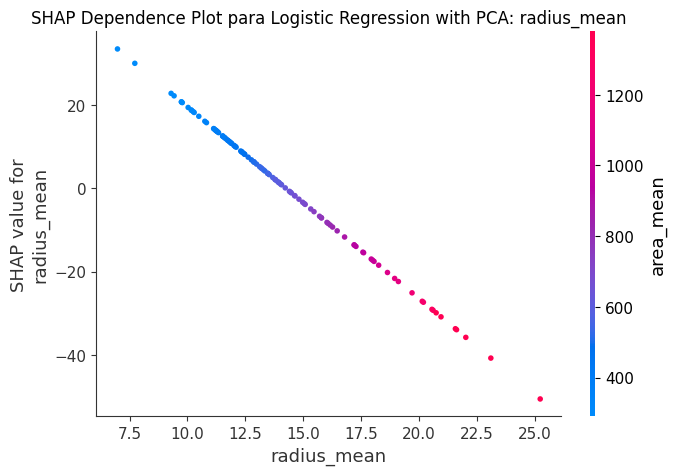


Exibindo o Gráfico de Força para a instância de teste 0


<Figure size 1200x600 with 0 Axes>

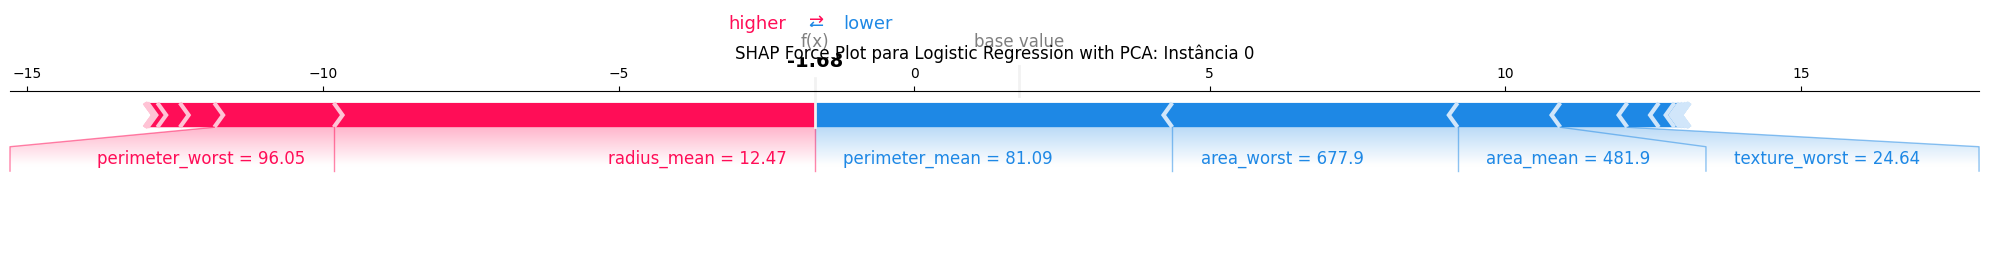


--- Análise SHAP Concluída para o Melhor Modelo. ---


In [55]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# --- Assumimos que as seguintes variáveis já estão definidas e corretas: ---
# y_train (as labels de treino)
# X_train (DataFrame Pandas com as 7 componentes PCA para treino)
# X_test (DataFrame Pandas com as 7 componentes PCA para teste)
# ---

# 1. Definir o nome do modelo (para os títulos dos gráficos e nomes de arquivos)
model_name_for_shap = "Logistic Regression with"

print(f"\n--- Iniciando a interpretação SHAP para o modelo: {model_name_for_shap} ---")

# 2. Treinar o modelo usando GridSearchCV para obter o melhor estimador
model_to_tune = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(model_to_tune, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 3. Extrair o melhor modelo treinado
best_model_object = grid_search.best_estimator_

# 4. Criar o Explainer SHAP, usando o modelo otimizado e os dados de treino
explainer = shap.LinearExplainer(best_model_object, X_train)

# 5. Calcular os valores SHAP para o conjunto de teste
print("\nCalculando os valores SHAP para o conjunto de teste...")
shap_values = explainer.shap_values(X_test)
print("Valores SHAP calculados.")



print("\nGerando gráficos SHAP para insights do modelo...")

# --- Novo Bloco: Agrupar gráficos por classe ---
# Itera sobre as classes, mostrando todos os gráficos de uma classe antes de passar para a próxima.
print(f"O tipo de shap_values é: {type(shap_values)}")
print(f"O número de classes é: {len(shap_values)}")
print(f"O formato da matriz para a classe 0 é: {shap_values[0].shape}")
print(f"O formato da matriz para a classe 1 é: {shap_values[1].shape}")


# --- 4.1. Gráfico de Resumo (Summary Plot) para a Classe Atual ---
print(f"\nExibindo o Gráfico de Resumo (Summary Plot) - Importância Global das Features ...")
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
shap.summary_plot(shap_values, X_test, show=False)
plt.title(f'SHAP Summary Plot para {model_name_for_shap}: Impacto')
plt.show()

# --- 4.2. Gráfico de Dependência (Dependence Plot) para a Classe Atual ---
# Calculamos a feature mais importante para CADA CLASSE SEPARADAMENTE
mean_abs_shap_for_class = np.abs(shap_values).mean(0)
feature_importances_series_for_class = pd.Series(mean_abs_shap_for_class, index=X_test.columns)
most_important_feature_for_class = feature_importances_series_for_class.idxmax()
shap_values_for_instance = shap_values[instance_to_explain_index, :]
print(shap_values_for_instance)

print(f"\nExibindo o Gráfico de Dependência para a feature mais importante '{most_important_feature_for_class}'")
plt.figure(figsize=(10, 6))
shap.dependence_plot(
    most_important_feature_for_class,
    shap_values,
    X_test,
    feature_names=X_test.columns.tolist(),
    show=False
)
plt.title(f'SHAP Dependence Plot para {model_name_for_shap}: {most_important_feature_for_class}')
plt.show()
# --- 4.3. Gráfico de Força (Force Plot) para uma Previsão Individual da Classe Atual ---
instance_to_explain_index = 0
print(f"\nExibindo o Gráfico de Força para a instância de teste {instance_to_explain_index}")

# Acessa os SHAP values da instância e da classe

# Acessa os valores das features da instância
features_for_instance = X_test.iloc[instance_to_explain_index, :]

# Passa todos os argumentos na ordem correta
plt.figure(figsize=(12, 6)) # Aumenta o tamanho do Force Plot
shap.force_plot(
    explainer.expected_value,
    shap_values_for_instance,
    features_for_instance,
    feature_names=X_test.columns.tolist(),
    matplotlib=True,
    show=False
)
plt.title(f'SHAP Force Plot para {model_name_for_shap}: Instância {instance_to_explain_index}')
plt.tight_layout()
plt.show()

print("\n--- Análise SHAP Concluída para o Melhor Modelo. ---")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')